In [2]:
#import libraries
import requests, zipfile
import pandas as pd
import io
import os
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt
from io import StringIO
import itertools as it
from datetime import datetime
import sklearn as sklearn
np.set_printoptions(threshold=sys.maxsize)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
#declare global variables 
daily_monthly = 'daily'
time_lapse = '4h'
bitcoin_par = 'BTCBUSD'
year_2022 = '2022-'
year_2023 = '2023-'
url = 'https://data.binance.vision/data/spot/'+daily_monthly+'/klines/'+bitcoin_par+'/'+time_lapse+'/'+bitcoin_par+'-'+time_lapse+'-'
zip = '.zip'

print(url)

https://data.binance.vision/data/spot/daily/klines/BTCBUSD/4h/BTCBUSD-4h-


In [173]:
x = np.array([], dtype=np.uint32)
y = np.array([], dtype=np.uint32)
#download the data and unzip
try:
    for year_loop in range(2021, 2024):
        for month_loop in range(1, 13):
            if month_loop in (1,3,5,7,8,10,12):
                days_range = 32
            elif month_loop in (4,6,9,11):
                days_range = 31
            else:
                days_range = 29
            month_inloop =  '0'+str(month_loop) if month_loop < 10 else str(month_loop)
            for day_loop in range(1, days_range):#days_range
                day_inloop = '0'+str(day_loop) if day_loop < 10 else str(day_loop)
                url_loop = url+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+zip
                #print(url_loop)
                #requeset info from binance
                #req_loop = requests.get(url_loop, stream=True)
                #print(req_loop.status_code)
                if  ((year_loop  >= 2021 and month_loop >= 3)):#and (year_loop <= 2023 and month_loop <= 1 and day_loop <= 5)
                    #z = zipfile.ZipFile(io.BytesIO(req_loop.content))
                    #z.extractall(os.path.join(os.getcwd(), 'data-btc'))
                    csv_name_loop = bitcoin_par+'-'+time_lapse+'-'+str(year_loop)+'-'+str(month_inloop)+'-'+str(day_inloop)+'.csv'
                    print(csv_name_loop)
                    df  =    pd.read_csv(os.path.join(os.getcwd(), 'data-btc', csv_name_loop)
                    , header = None
                    , names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore'])
                    x_time = df[['Open time']].to_numpy(dtype = np.float32)
                    x = np.append(x, x_time)
                    y_price_high = df[['High']].to_numpy(dtype = np.float32)
                    y_price_close = df[['Low']].to_numpy(dtype = np.float32)
                    y_promedio = np.add(y_price_high, y_price_close)
                    y_promedio =  y_promedio/2
                    y = np.append(y, y_promedio)
except:
    print("Error")



#print(df.shape)
#df.head


BTCBUSD-4h-2021-03-01.csv
BTCBUSD-4h-2021-03-02.csv
BTCBUSD-4h-2021-03-03.csv
BTCBUSD-4h-2021-03-04.csv
BTCBUSD-4h-2021-03-05.csv
BTCBUSD-4h-2021-03-06.csv
BTCBUSD-4h-2021-03-07.csv
BTCBUSD-4h-2021-03-08.csv
BTCBUSD-4h-2021-03-09.csv
BTCBUSD-4h-2021-03-10.csv
BTCBUSD-4h-2021-03-11.csv
BTCBUSD-4h-2021-03-12.csv
BTCBUSD-4h-2021-03-13.csv
BTCBUSD-4h-2021-03-14.csv
BTCBUSD-4h-2021-03-15.csv
BTCBUSD-4h-2021-03-16.csv
BTCBUSD-4h-2021-03-17.csv
BTCBUSD-4h-2021-03-18.csv
BTCBUSD-4h-2021-03-19.csv
BTCBUSD-4h-2021-03-20.csv
BTCBUSD-4h-2021-03-21.csv
BTCBUSD-4h-2021-03-22.csv
BTCBUSD-4h-2021-03-23.csv
BTCBUSD-4h-2021-03-24.csv
BTCBUSD-4h-2021-03-25.csv
BTCBUSD-4h-2021-03-26.csv
BTCBUSD-4h-2021-03-27.csv
BTCBUSD-4h-2021-03-28.csv
BTCBUSD-4h-2021-03-29.csv
BTCBUSD-4h-2021-03-30.csv
BTCBUSD-4h-2021-03-31.csv
BTCBUSD-4h-2021-04-01.csv
BTCBUSD-4h-2021-04-02.csv
BTCBUSD-4h-2021-04-03.csv
BTCBUSD-4h-2021-04-04.csv
BTCBUSD-4h-2021-04-05.csv
BTCBUSD-4h-2021-04-06.csv
BTCBUSD-4h-2021-04-07.csv
BTCBUSD-4h-2

In [170]:
df_scal = pd.DataFrame(y)
scaler = MinMaxScaler(feature_range=(0,1))
y_close=scaler.fit_transform(np.array(df_scal).reshape(-1,1))

(30,)


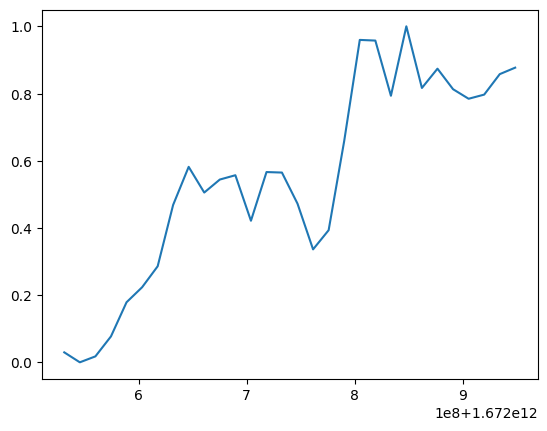

In [171]:
print(y.shape)
#plt.plot(x, y)
plt.plot(x, y_close)
plt.show()

(2190,)


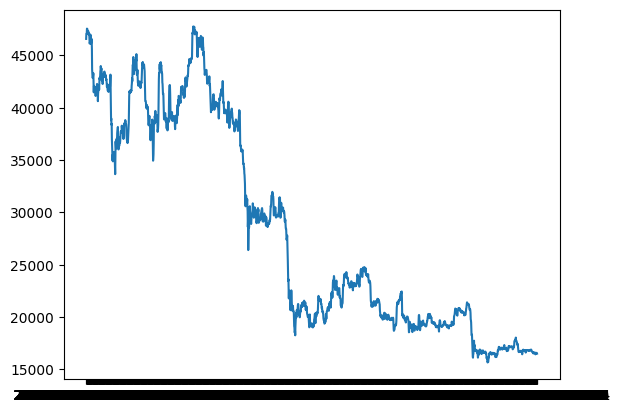

In [7]:
def cast_time_data(np_array):
    x_new_time = []
    for time_unix in np_array:
        new_time = int(str(time_unix)[0:10])
        unixToDatetime = datetime.fromtimestamp(new_time).strftime('%Y-%m-%d %H:%M:%S')
        x_new_time.append(unixToDatetime)
    return np.array(x_new_time)
x_new_time = cast_time_data(x)
print(x_new_time.shape)
plt.plot(x_new_time, y)
plt.show()

In [8]:
def prepare_y_series(np_array, series_size = 10):
    x_series = []
    y_series = []
    for y_val in range(len(np_array)-series_size):
        x_series.append([[a] for a in np_array[y_val:y_val+series_size]])
        y_series.append(np_array[y_val+series_size])
        #print(np_array[y_val+series_size])
    #print(np.array(y_series))
    return np.array(x_series), np.array(y_series)
x_series_def, y_series_def = prepare_y_series(y_close)
#prepare_data_in_percentage
nint_perc = int(len(x_series_def)*.90)
nintfive_perc = int(len(x_series_def)*.95)
hun_perc = int(len(x_series_def)*1.0)
x_train, y_train = x_series_def[:nint_perc], y_series_def[:nint_perc]
x_valid, y_valid = x_series_def[nint_perc:nintfive_perc], y_series_def[nint_perc:nintfive_perc]
x_test, y_test = x_series_def[nintfive_perc:hun_perc], y_series_def[nintfive_perc:hun_perc]
x_plt_train = x[:nint_perc]
x_plt_valid = x[nint_perc:nintfive_perc]
x_plt_test = x[nintfive_perc:hun_perc]

In [9]:
#new maderfucking model
mamfmodel = tf.keras.models.Sequential()
mamfmodel.add(tf.keras.layers.InputLayer((10, 1)))
mamfmodel.add(tf.keras.layers.LSTM(units = 64))
mamfmodel.add(tf.keras.layers.Dense(8, 'relu'))
mamfmodel.add(tf.keras.layers.Dense(1, 'linear'))
mamfmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [10]:
cp = tf.keras.callbacks.ModelCheckpoint('mamfmodel/', save_best_only=True)
mamfmodel.compile(loss='mean_squared_error', optimizer='adam',metrics= tf.keras.metrics.RootMeanSquaredError())
mamfmodel.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, callbacks=[cp])

Epoch 1/100
59/62 [===========================>..] - ETA: 0s - loss: 0.0738 - root_mean_squared_error: 0.2717

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 5s 54ms/step - loss: 0.0711 - root_mean_squared_error: 0.2666 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 2/100
60/62 [============================>.] - ETA: 0s - loss: 8.3552e-04 - root_mean_squared_error: 0.0289

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 53ms/step - loss: 8.2839e-04 - root_mean_squared_error: 0.0288 - val_loss: 2.4760e-04 - val_root_mean_squared_error: 0.0157
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 7.4970e-04 - root_mean_squared_error: 0.0274 - val_loss: 2.5557e-04 - val_root_mean_squared_error: 0.0160
Epoch 4/100
57/62 [==========================>...] - ETA: 0s - loss: 7.5022e-04 - root_mean_squared_error: 0.0274

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 51ms/step - loss: 7.5107e-04 - root_mean_squared_error: 0.0274 - val_loss: 1.7799e-04 - val_root_mean_squared_error: 0.0133
Epoch 5/100
54/62 [=========================>....] - ETA: 0s - loss: 8.0104e-04 - root_mean_squared_error: 0.0283

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 46ms/step - loss: 7.8350e-04 - root_mean_squared_error: 0.0280 - val_loss: 1.2975e-04 - val_root_mean_squared_error: 0.0114
Epoch 6/100
48/62 [======================>.......] - ETA: 0s - loss: 7.0902e-04 - root_mean_squared_error: 0.0266

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 52ms/step - loss: 7.0944e-04 - root_mean_squared_error: 0.0266 - val_loss: 8.5952e-05 - val_root_mean_squared_error: 0.0093
Epoch 7/100
61/62 [============================>.] - ETA: 0s - loss: 6.8941e-04 - root_mean_squared_error: 0.0263

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 47ms/step - loss: 6.8901e-04 - root_mean_squared_error: 0.0262 - val_loss: 5.9822e-05 - val_root_mean_squared_error: 0.0077
Epoch 8/100
62/62 [==============================] - 0s 4ms/step - loss: 6.6351e-04 - root_mean_squared_error: 0.0258 - val_loss: 6.5455e-05 - val_root_mean_squared_error: 0.0081
Epoch 9/100
62/62 [==============================] - 0s 4ms/step - loss: 6.5315e-04 - root_mean_squared_error: 0.0256 - val_loss: 7.2133e-05 - val_root_mean_squared_error: 0.0085
Epoch 10/100
49/62 [======================>.......] - ETA: 0s - loss: 6.5888e-04 - root_mean_squared_error: 0.0257

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 51ms/step - loss: 6.6357e-04 - root_mean_squared_error: 0.0258 - val_loss: 3.3157e-05 - val_root_mean_squared_error: 0.0058
Epoch 11/100
62/62 [==============================] - 0s 5ms/step - loss: 6.2173e-04 - root_mean_squared_error: 0.0249 - val_loss: 3.7848e-05 - val_root_mean_squared_error: 0.0062
Epoch 12/100
62/62 [==============================] - 0s 4ms/step - loss: 6.0737e-04 - root_mean_squared_error: 0.0246 - val_loss: 7.0540e-05 - val_root_mean_squared_error: 0.0084
Epoch 13/100
62/62 [==============================] - 0s 4ms/step - loss: 5.9995e-04 - root_mean_squared_error: 0.0245 - val_loss: 3.3971e-05 - val_root_mean_squared_error: 0.0058
Epoch 14/100
62/62 [==============================] - 0s 4ms/step - loss: 6.1167e-04 - root_mean_squared_error: 0.0247 - val_loss: 3.4351e-05 - val_root_mean_squared_error: 0.0059
Epoch 15/100
62/62 [==============================] - 0s 4ms/step - loss: 6.5361e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 46ms/step - loss: 5.0944e-04 - root_mean_squared_error: 0.0226 - val_loss: 2.7309e-05 - val_root_mean_squared_error: 0.0052
Epoch 19/100
62/62 [==============================] - 0s 4ms/step - loss: 5.2140e-04 - root_mean_squared_error: 0.0228 - val_loss: 3.1909e-05 - val_root_mean_squared_error: 0.0056
Epoch 20/100
62/62 [==============================] - 0s 4ms/step - loss: 4.9171e-04 - root_mean_squared_error: 0.0222 - val_loss: 3.2716e-05 - val_root_mean_squared_error: 0.0057
Epoch 21/100
50/62 [=======================>......] - ETA: 0s - loss: 4.6253e-04 - root_mean_squared_error: 0.0215

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 50ms/step - loss: 4.5127e-04 - root_mean_squared_error: 0.0212 - val_loss: 2.5652e-05 - val_root_mean_squared_error: 0.0051
Epoch 22/100
54/62 [=========================>....] - ETA: 0s - loss: 4.6744e-04 - root_mean_squared_error: 0.0216

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 48ms/step - loss: 4.5629e-04 - root_mean_squared_error: 0.0214 - val_loss: 2.4569e-05 - val_root_mean_squared_error: 0.0050
Epoch 23/100
62/62 [==============================] - 0s 4ms/step - loss: 4.1288e-04 - root_mean_squared_error: 0.0203 - val_loss: 2.5258e-05 - val_root_mean_squared_error: 0.0050
Epoch 24/100
61/62 [============================>.] - ETA: 0s - loss: 4.2843e-04 - root_mean_squared_error: 0.0207

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 51ms/step - loss: 4.2745e-04 - root_mean_squared_error: 0.0207 - val_loss: 2.3666e-05 - val_root_mean_squared_error: 0.0049
Epoch 25/100
62/62 [==============================] - 0s 4ms/step - loss: 3.9009e-04 - root_mean_squared_error: 0.0198 - val_loss: 3.7474e-05 - val_root_mean_squared_error: 0.0061
Epoch 26/100
62/62 [==============================] - 0s 4ms/step - loss: 4.4731e-04 - root_mean_squared_error: 0.0211 - val_loss: 2.5697e-05 - val_root_mean_squared_error: 0.0051
Epoch 27/100
62/62 [==============================] - 0s 4ms/step - loss: 4.1638e-04 - root_mean_squared_error: 0.0204 - val_loss: 3.8368e-05 - val_root_mean_squared_error: 0.0062
Epoch 28/100
62/62 [==============================] - 0s 4ms/step - loss: 4.1384e-04 - root_mean_squared_error: 0.0203 - val_loss: 2.3926e-05 - val_root_mean_squared_error: 0.0049
Epoch 29/100
51/62 [=======================>......] - ETA: 0s - loss: 3.8200e-04 - root_mean_squared_error: 0.01

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 45ms/step - loss: 3.8010e-04 - root_mean_squared_error: 0.0195 - val_loss: 2.1662e-05 - val_root_mean_squared_error: 0.0047
Epoch 30/100
62/62 [==============================] - 0s 4ms/step - loss: 3.3779e-04 - root_mean_squared_error: 0.0184 - val_loss: 4.1677e-05 - val_root_mean_squared_error: 0.0065
Epoch 31/100
62/62 [==============================] - 0s 4ms/step - loss: 3.3610e-04 - root_mean_squared_error: 0.0183 - val_loss: 2.5354e-05 - val_root_mean_squared_error: 0.0050
Epoch 32/100
62/62 [==============================] - 0s 4ms/step - loss: 3.2477e-04 - root_mean_squared_error: 0.0180 - val_loss: 3.0999e-05 - val_root_mean_squared_error: 0.0056
Epoch 33/100
62/62 [==============================] - 0s 4ms/step - loss: 3.1981e-04 - root_mean_squared_error: 0.0179 - val_loss: 2.7777e-05 - val_root_mean_squared_error: 0.0053
Epoch 34/100
62/62 [==============================] - 0s 4ms/step - loss: 3.1641e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 50ms/step - loss: 3.2263e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.9847e-05 - val_root_mean_squared_error: 0.0045
Epoch 36/100
62/62 [==============================] - 0s 5ms/step - loss: 3.1533e-04 - root_mean_squared_error: 0.0178 - val_loss: 2.0818e-05 - val_root_mean_squared_error: 0.0046
Epoch 37/100
62/62 [==============================] - 0s 4ms/step - loss: 3.2520e-04 - root_mean_squared_error: 0.0180 - val_loss: 2.1081e-05 - val_root_mean_squared_error: 0.0046
Epoch 38/100
62/62 [==============================] - 0s 4ms/step - loss: 2.9306e-04 - root_mean_squared_error: 0.0171 - val_loss: 5.4745e-05 - val_root_mean_squared_error: 0.0074
Epoch 39/100
51/62 [=======================>......] - ETA: 0s - loss: 3.4441e-04 - root_mean_squared_error: 0.0186

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 46ms/step - loss: 3.4046e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.9103e-05 - val_root_mean_squared_error: 0.0044
Epoch 40/100
61/62 [============================>.] - ETA: 0s - loss: 3.0115e-04 - root_mean_squared_error: 0.0174

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 51ms/step - loss: 3.0108e-04 - root_mean_squared_error: 0.0174 - val_loss: 1.7910e-05 - val_root_mean_squared_error: 0.0042
Epoch 41/100
62/62 [==============================] - 0s 6ms/step - loss: 2.8887e-04 - root_mean_squared_error: 0.0170 - val_loss: 2.2305e-05 - val_root_mean_squared_error: 0.0047
Epoch 42/100
62/62 [==============================] - 0s 4ms/step - loss: 2.8854e-04 - root_mean_squared_error: 0.0170 - val_loss: 2.0142e-05 - val_root_mean_squared_error: 0.0045
Epoch 43/100
62/62 [==============================] - 0s 4ms/step - loss: 3.1305e-04 - root_mean_squared_error: 0.0177 - val_loss: 3.0661e-05 - val_root_mean_squared_error: 0.0055
Epoch 44/100
62/62 [==============================] - 0s 4ms/step - loss: 2.6440e-04 - root_mean_squared_error: 0.0163 - val_loss: 1.9953e-05 - val_root_mean_squared_error: 0.0045
Epoch 45/100
51/62 [=======================>......] - ETA: 0s - loss: 3.0816e-04 - root_mean_squared_error: 0.01

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 45ms/step - loss: 2.9508e-04 - root_mean_squared_error: 0.0172 - val_loss: 1.6695e-05 - val_root_mean_squared_error: 0.0041
Epoch 46/100
62/62 [==============================] - 0s 4ms/step - loss: 2.4883e-04 - root_mean_squared_error: 0.0158 - val_loss: 3.3365e-05 - val_root_mean_squared_error: 0.0058
Epoch 47/100
62/62 [==============================] - 0s 4ms/step - loss: 2.5453e-04 - root_mean_squared_error: 0.0160 - val_loss: 2.0064e-05 - val_root_mean_squared_error: 0.0045
Epoch 48/100
62/62 [==============================] - 0s 4ms/step - loss: 2.6756e-04 - root_mean_squared_error: 0.0164 - val_loss: 2.0971e-05 - val_root_mean_squared_error: 0.0046
Epoch 49/100
62/62 [==============================] - 0s 4ms/step - loss: 2.4571e-04 - root_mean_squared_error: 0.0157 - val_loss: 3.4752e-05 - val_root_mean_squared_error: 0.0059
Epoch 50/100
50/62 [=======================>......] - ETA: 0s - loss: 2.5270e-04 - root_mean_squared_error: 0.01

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 51ms/step - loss: 2.5179e-04 - root_mean_squared_error: 0.0159 - val_loss: 1.5816e-05 - val_root_mean_squared_error: 0.0040
Epoch 51/100
62/62 [==============================] - 0s 5ms/step - loss: 2.4295e-04 - root_mean_squared_error: 0.0156 - val_loss: 1.6421e-05 - val_root_mean_squared_error: 0.0041
Epoch 52/100
50/62 [=======================>......] - ETA: 0s - loss: 2.4420e-04 - root_mean_squared_error: 0.0156

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 46ms/step - loss: 2.5287e-04 - root_mean_squared_error: 0.0159 - val_loss: 1.5561e-05 - val_root_mean_squared_error: 0.0039
Epoch 53/100
62/62 [==============================] - 0s 4ms/step - loss: 2.3543e-04 - root_mean_squared_error: 0.0153 - val_loss: 1.7066e-05 - val_root_mean_squared_error: 0.0041
Epoch 54/100
62/62 [==============================] - 0s 4ms/step - loss: 2.4938e-04 - root_mean_squared_error: 0.0158 - val_loss: 2.0927e-05 - val_root_mean_squared_error: 0.0046
Epoch 55/100
62/62 [==============================] - 0s 4ms/step - loss: 2.2273e-04 - root_mean_squared_error: 0.0149 - val_loss: 1.7446e-05 - val_root_mean_squared_error: 0.0042
Epoch 56/100
62/62 [==============================] - 0s 4ms/step - loss: 2.2086e-04 - root_mean_squared_error: 0.0149 - val_loss: 3.4673e-05 - val_root_mean_squared_error: 0.0059
Epoch 57/100
48/62 [======================>.......] - ETA: 0s - loss: 2.1458e-04 - root_mean_squared_error: 0.01

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 50ms/step - loss: 2.1625e-04 - root_mean_squared_error: 0.0147 - val_loss: 1.4666e-05 - val_root_mean_squared_error: 0.0038
Epoch 58/100
55/62 [=========================>....] - ETA: 0s - loss: 2.0492e-04 - root_mean_squared_error: 0.0143

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 47ms/step - loss: 2.0207e-04 - root_mean_squared_error: 0.0142 - val_loss: 1.4424e-05 - val_root_mean_squared_error: 0.0038
Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 2.1302e-04 - root_mean_squared_error: 0.0146 - val_loss: 2.1641e-05 - val_root_mean_squared_error: 0.0047
Epoch 60/100
62/62 [==============================] - 0s 4ms/step - loss: 1.9964e-04 - root_mean_squared_error: 0.0141 - val_loss: 1.6064e-05 - val_root_mean_squared_error: 0.0040
Epoch 61/100
50/62 [=======================>......] - ETA: 0s - loss: 1.9902e-04 - root_mean_squared_error: 0.0141

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 51ms/step - loss: 1.9426e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.4238e-05 - val_root_mean_squared_error: 0.0038
Epoch 62/100
62/62 [==============================] - 0s 4ms/step - loss: 2.1604e-04 - root_mean_squared_error: 0.0147 - val_loss: 1.6302e-05 - val_root_mean_squared_error: 0.0040
Epoch 63/100
62/62 [==============================] - 0s 4ms/step - loss: 2.1485e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.3294e-05 - val_root_mean_squared_error: 0.0048
Epoch 64/100
62/62 [==============================] - 0s 4ms/step - loss: 1.9676e-04 - root_mean_squared_error: 0.0140 - val_loss: 1.4535e-05 - val_root_mean_squared_error: 0.0038
Epoch 65/100
51/62 [=======================>......] - ETA: 0s - loss: 1.8391e-04 - root_mean_squared_error: 0.0136

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 46ms/step - loss: 1.9055e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.2957e-05 - val_root_mean_squared_error: 0.0036
Epoch 66/100
50/62 [=======================>......] - ETA: 0s - loss: 1.6876e-04 - root_mean_squared_error: 0.0130

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 47ms/step - loss: 1.7822e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.2501e-05 - val_root_mean_squared_error: 0.0035
Epoch 67/100
62/62 [==============================] - 0s 4ms/step - loss: 1.8469e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.6610e-05 - val_root_mean_squared_error: 0.0041
Epoch 68/100
62/62 [==============================] - 0s 4ms/step - loss: 2.0577e-04 - root_mean_squared_error: 0.0143 - val_loss: 1.2900e-05 - val_root_mean_squared_error: 0.0036
Epoch 69/100
62/62 [==============================] - 0s 4ms/step - loss: 1.7530e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.4999e-05 - val_root_mean_squared_error: 0.0050
Epoch 70/100
62/62 [==============================] - 0s 4ms/step - loss: 1.6823e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.5820e-05 - val_root_mean_squared_error: 0.0040
Epoch 71/100
62/62 [==============================] - 0s 4ms/step - loss: 1.8880e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 52ms/step - loss: 1.6167e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.1423e-05 - val_root_mean_squared_error: 0.0034
Epoch 75/100
62/62 [==============================] - 0s 4ms/step - loss: 1.5948e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.2222e-05 - val_root_mean_squared_error: 0.0035
Epoch 76/100
62/62 [==============================] - 0s 5ms/step - loss: 1.5072e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.4537e-05 - val_root_mean_squared_error: 0.0038
Epoch 77/100
62/62 [==============================] - 0s 4ms/step - loss: 1.7536e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.2656e-05 - val_root_mean_squared_error: 0.0036
Epoch 78/100
62/62 [==============================] - 0s 4ms/step - loss: 1.5558e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.2295e-05 - val_root_mean_squared_error: 0.0035
Epoch 79/100
49/62 [======================>.......] - ETA: 0s - loss: 1.5108e-04 - root_mean_squared_error: 0.01

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 50ms/step - loss: 1.5331e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.1131e-05 - val_root_mean_squared_error: 0.0033
Epoch 80/100
62/62 [==============================] - 0s 4ms/step - loss: 1.5869e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.5386e-05 - val_root_mean_squared_error: 0.0039
Epoch 81/100
62/62 [==============================] - 0s 5ms/step - loss: 1.7532e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.3291e-05 - val_root_mean_squared_error: 0.0036
Epoch 82/100
62/62 [==============================] - ETA: 0s - loss: 1.4519e-04 - root_mean_squared_error: 0.0120

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 49ms/step - loss: 1.4519e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.0786e-05 - val_root_mean_squared_error: 0.0033
Epoch 83/100
49/62 [======================>.......] - ETA: 0s - loss: 1.5159e-04 - root_mean_squared_error: 0.0123

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 52ms/step - loss: 1.5371e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.0330e-05 - val_root_mean_squared_error: 0.0032
Epoch 84/100
62/62 [==============================] - 0s 4ms/step - loss: 1.4894e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.1335e-05 - val_root_mean_squared_error: 0.0034
Epoch 85/100
60/62 [============================>.] - ETA: 0s - loss: 1.4776e-04 - root_mean_squared_error: 0.0122

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 48ms/step - loss: 1.4892e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.0063e-05 - val_root_mean_squared_error: 0.0032
Epoch 86/100
62/62 [==============================] - 0s 4ms/step - loss: 1.5235e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.0206e-05 - val_root_mean_squared_error: 0.0032
Epoch 87/100
62/62 [==============================] - 0s 4ms/step - loss: 1.5802e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.4416e-05 - val_root_mean_squared_error: 0.0038
Epoch 88/100
62/62 [==============================] - 0s 5ms/step - loss: 1.6476e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.0337e-05 - val_root_mean_squared_error: 0.0032
Epoch 89/100
62/62 [==============================] - 0s 6ms/step - loss: 1.4123e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.4658e-05 - val_root_mean_squared_error: 0.0038
Epoch 90/100
62/62 [==============================] - 0s 5ms/step - loss: 1.5324e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 57ms/step - loss: 1.3650e-04 - root_mean_squared_error: 0.0117 - val_loss: 9.4297e-06 - val_root_mean_squared_error: 0.0031
Epoch 94/100
62/62 [==============================] - 0s 5ms/step - loss: 1.2970e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.2927e-05 - val_root_mean_squared_error: 0.0036
Epoch 95/100
62/62 [==============================] - 0s 4ms/step - loss: 1.2857e-04 - root_mean_squared_error: 0.0113 - val_loss: 2.0526e-05 - val_root_mean_squared_error: 0.0045
Epoch 96/100
62/62 [==============================] - 0s 4ms/step - loss: 1.4264e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.1705e-05 - val_root_mean_squared_error: 0.0034
Epoch 97/100
62/62 [==============================] - 0s 4ms/step - loss: 1.3809e-04 - root_mean_squared_error: 0.0118 - val_loss: 2.1553e-05 - val_root_mean_squared_error: 0.0046
Epoch 98/100
62/62 [==============================] - 0s 4ms/step - loss: 1.4109e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: mamfmodel\assets


INFO:tensorflow:Assets written to: mamfmodel\assets


62/62 [==============================] - 3s 49ms/step - loss: 1.2781e-04 - root_mean_squared_error: 0.0113 - val_loss: 9.0173e-06 - val_root_mean_squared_error: 0.0030


4/4 [==============================] - 0s 1ms/step


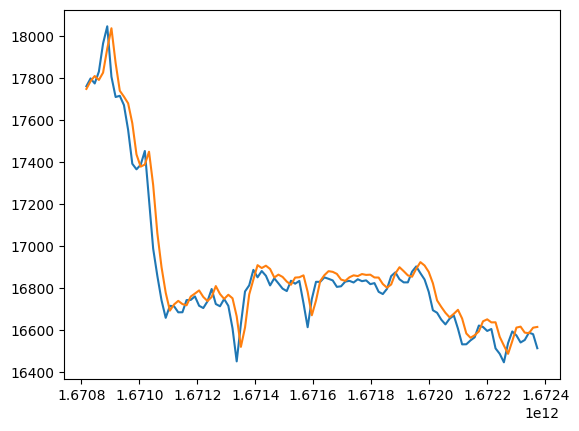

In [11]:
y_pred = mamfmodel.predict(x_test)
y_predict = scaler.inverse_transform(y_pred)
test_predict = scaler.inverse_transform(y_test)

#print(y_pred)
#print(x_plt_test)
plt.plot(x_plt_test,test_predict)
plt.plot(x_plt_test,y_predict)
plt.show()

69/69 [==============================] - 0s 2ms/step
(2180,) (2180, 1)


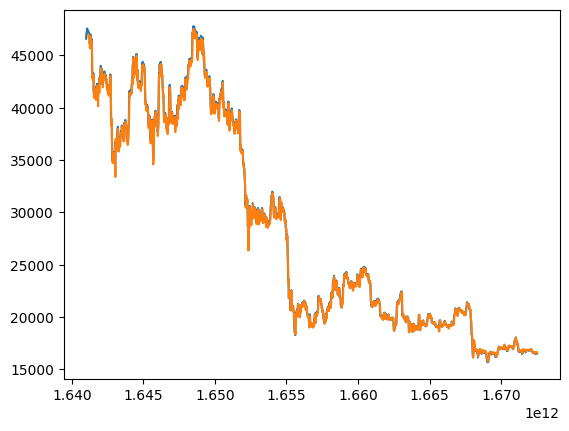

In [12]:
y_pred = mamfmodel.predict(x_series_def)
y_predict = scaler.inverse_transform(y_pred)
x_plot = x[10:]
print(x_plot.shape, y_pred.shape)
plt.plot(x,y)
plt.plot(x_plot,y_predict)
plt.show()

In [25]:
print(x_series_def[-1])
print (y_pred[-1])
last_series = np.array([x_series_def[-1]])
pred = mamfmodel.predict(last_series).flatten()
new_pred_series = np.delete(last_series, 0)
new_pred_series = np.append(new_pred_series, pred)
print(np.array([new_pred_series]))
#pred = mamfmodel.predict().flatten()
#print(y_pred[-1])


[[[0.02630504]]

 [[0.02549733]]

 [[0.02423699]]

 [[0.02709523]]

 [[0.02881167]]

 [[0.02822492]]

 [[0.02717787]]

 [[0.02754956]]

 [[0.02864104]]

 [[0.02840706]]]
[0.02948226]
1/1 [==============================] - 0s 26ms/step
[[0.02549733 0.02423699 0.02709523 0.02881167 0.02822492 0.02717787
  0.02754956 0.02864104 0.02840706 0.02948224]]


In [123]:
def bracket_list(list):
    new_list = []
    for value in range(len(list)):
        new_value = [list[value]]
        new_list.append(new_value)
    return np.array([new_list])

def predict_next_days(model_ker : tf.keras.models, data , days = 1, hours = 4):
    new_data = data
    last_days = []
    last_series = np.array([data[-1]])
    pred = mamfmodel.predict(last_series).flatten()
    new_pred_series = np.delete(last_series, 0)
    new_pred_series = np.append(new_pred_series, pred)
    new_pred_series = bracket_list(new_pred_series)
    last_series = new_pred_series
    for i in range(days*hours):
        pred = mamfmodel.predict(last_series).flatten()
        new_pred_series = np.delete(last_series, 0)
        new_pred_series = np.append(new_pred_series, pred)
        new_pred_series = bracket_list(new_pred_series)
        last_series = new_pred_series
        last_days.append(pred)
    return np.array(last_days)

def add_days(x_ser, days = 1, hours = 4):
    new_days = []
    new_day = x_ser[-1] + 4*60*60*1000
    #range_h = int(24/hours)
    for i in range(days*hours):
        new_days.append(new_day)
        new_day += 4*60*60*1000
    return np.array(new_days)


#print(y_close.shape)
x_next_days = add_days(x, days = 3 )
y_next_pred = predict_next_days(mamfmodel, x_series_def , 3)
print(x_next_days.shape)
print(y_next_pred)

1/1 [==============================] - 0s 28ms/step
(12,)
[[0.03028936]
 [0.03113408]
 [0.03198642]
 [0.03282885]
 [0.03365555]
 [0.03446594]
 [0.03526028]
 [0.03603859]
 [0.03680142]
 [0.03755003]
 [0.03828435]
 [0.03900483]]
